In [1]:
#load some libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from keras.utils.np_utils import to_categorical
import pandas as pd

Using TensorFlow backend.


In [2]:
#load dataset of MNIST
data = pd.read_csv('MNIST.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#shape of dataset
data.shape

(42000, 785)

In [4]:
#check  mising values
data.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

There is no any missing values

In [5]:
#Count the values of target variable
data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

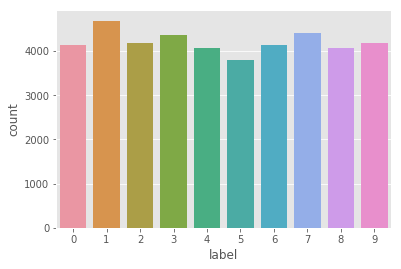

In [6]:
#count plot for target 
plt.style.use('ggplot')
sb.countplot(x='label', data=data)
plt.show()

## Let's prepare data for prediction

In [7]:
#separate the data with features and target
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [8]:
#one hot embedding
#ex :- 2 [0, 0, 1, 0, ......., 0]
y = to_categorical(y)

In [9]:
#Split the data into test and train format
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [10]:
#load keras library
from keras.models import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(64, input_dim=784, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(16, init='uniform', activation='relu'))
model.add(Dense(10, activation='softmax'))

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
33600/33600 [==============================] - 4s 121us/step - loss: 0.3481 - acc: 0.8977
Epoch 2/100
33600/33600 [==============================] - 4s 116us/step - loss: 0.1601 - acc: 0.9517
Epoch 3/100
33600/33600 [==============================] - 4s 107us/step - loss: 0.1239 - acc: 0.9632
Epoch 4/100
33600/33600 [==============================] - 4s 106us/step - loss: 0.1029 - acc: 0.9690
Epoch 5/100
33600/33600 [==============================] - 4s 105us/step - loss: 0.0874 - acc: 0.9735
Epoch 6/100
33600/33600 [==============================] - 4s 105us/step - loss: 0.0804 - acc: 0.9755
Epoch 7/100
33600/33600 [==============================] - 4s 106us/step - loss: 0.0738 - acc: 0.9775
Epoch 8/100
33600/33600 [==============================] - 4s 107us/step - loss: 0.0664 - acc: 0.9799
Epoch 9/100
33600/33600 [==============================] - 4s 104us/step - loss: 0.0605 - acc: 0.9815
Epoch 10/100
33600/33600 [==============================] - 4s 107us/step - loss: 

33600/33600 [==============================] - 5s 135us/step - loss: 0.0104 - acc: 0.9976
Epoch 81/100
33600/33600 [==============================] - 4s 128us/step - loss: 0.0096 - acc: 0.9973
Epoch 82/100
33600/33600 [==============================] - 4s 114us/step - loss: 0.0104 - acc: 0.9977
Epoch 83/100
33600/33600 [==============================] - 4s 107us/step - loss: 0.0110 - acc: 0.9979
Epoch 84/100
33600/33600 [==============================] - 4s 115us/step - loss: 0.0112 - acc: 0.9979
Epoch 85/100
33600/33600 [==============================] - 6s 185us/step - loss: 0.0167 - acc: 0.9961
Epoch 86/100
33600/33600 [==============================] - 5s 137us/step - loss: 0.0060 - acc: 0.9988
Epoch 87/100
33600/33600 [==============================] - 5s 148us/step - loss: 0.0051 - acc: 0.9988
Epoch 88/100
33600/33600 [==============================] - 4s 116us/step - loss: 0.0129 - acc: 0.9972
Epoch 89/100
33600/33600 [==============================] - 4s 107us/step - loss: 0.01

In [15]:
#prediction
y_pre = model.predict_classes(X_test)

In [16]:
#let's from one hot encoding to class format
y_test_cls = np.argmax(y_test, axis=1)

In [17]:
#Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accurcy -- ", accuracy_score(y_test_cls, y_pre)*100)

Accurcy --  97.0


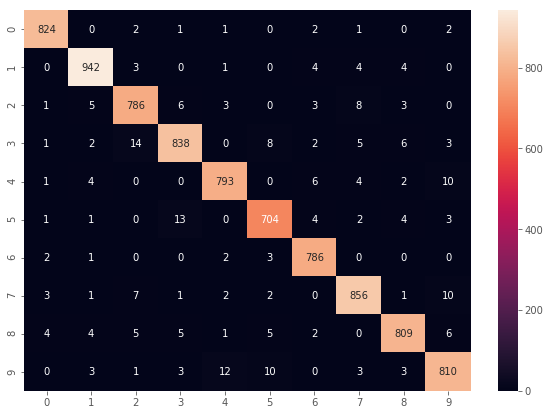

In [18]:
#let's plot confusion matrix
cm = confusion_matrix(y_test_cls, y_pre)
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g')
plt.show()